In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
IMG_SIZE = 96
USE_SUBSET = False
SUBSET_RATIO = 0.8
BATCH_SIZE = 1

In [3]:
import tensorflow_datasets as tfds

ds_splits, ds_info = tfds.load(
    'oxford_iiit_pet',
    split=['train[:70%]', 'train[70%:90%]', 'train[90%:]'],
    as_supervised=True,
    with_info=True
)

_, _, test_ds = ds_splits

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.E18JO0_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.E18JO0_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


In [4]:
# Get label names
class_names = ds_info.features['label'].names

In [6]:
from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model('/content/drive/MyDrive/Digitised work/mobilenet_model_pet_37_cls.h5')

In [8]:
import numpy as np
import tensorflow as tf

def predict_image(image_array):
    """
    Predict the class of a single image or batch of images.

    Parameters:
        image_array (np.array): RGB image of shape (H, W, 3) or batch (N, H, W, 3)

    Returns:
        list: Predicted class names
    """
    # Ensure batch dimension
    if image_array.ndim == 3:
        image_array = np.expand_dims(image_array, axis=0)

    # Resize and normalize using tf functions to be safe
    image_array = tf.convert_to_tensor(image_array, dtype=tf.float32)
    image_array = tf.image.resize(image_array, (IMG_SIZE, IMG_SIZE)) #/ 255.0

    # Predict
    predictions = model.predict(image_array)
    predicted_indices = np.argmax(predictions, axis=1)

    return [class_names[i] for i in predicted_indices]

In [13]:
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [16]:
import tensorflow as tf
import numpy as np

def extract_images_and_labels(dataset):
  """
  Extracts all images and labels from a TensorFlow Dataset.

  Args:
    dataset: A tf.data.Dataset object that yields tuples of (images, labels).
             It is assumed that the images tensor has a shape where the
             first dimension is the batch size. The labels tensor also has
             a first dimension corresponding to the batch size.

  Returns:
    A tuple containing:
      - images_list: A NumPy array containing all the images from the dataset.
                     Shape will be (num_samples, height, width, channels).
      - labels_list: A NumPy array containing all the corresponding labels.
                     Shape will be (num_samples,).
  """
  all_images = []
  all_labels = []
  for images, labels in dataset:
    all_images.extend(images.numpy())
    all_labels.extend(labels.numpy())
  return np.array(all_images), np.array(all_labels)

# Example usage with your test_ds:
x_test, y_test = extract_images_and_labels(test_ds)

# Now test_images is a NumPy array of your test images
# and test_labels is a NumPy array of your test labels

print(f"Shape of test images: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

# You can now use test_images to test your model, for example:
# predictions = new_model.predict(test_images)

Shape of test images: (368, 96, 96, 3)
Shape of test labels: (368,)


In [17]:
import matplotlib.pyplot as plt
import random


def make_prediction():
    # Pick a test image
    idx = random.choice(range(len(x_test)))
    sample_image = x_test[idx]
    true_label = y_test[idx]

    # Predict
    predicted_class = predict_image(sample_image)

    # Display result
    plt.imshow(sample_image)
    plt.title(f"Predicted: {predicted_class[0]}, True: {class_names[true_label]}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


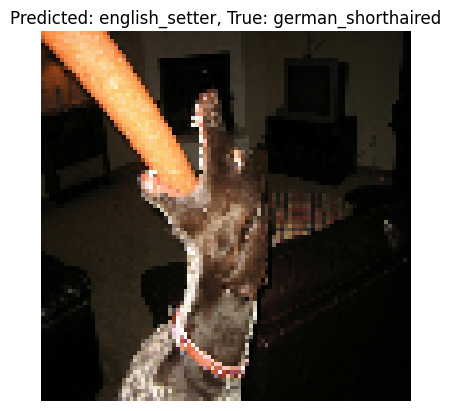

In [18]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


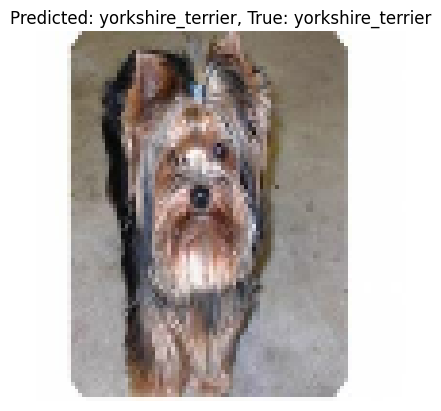

In [19]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


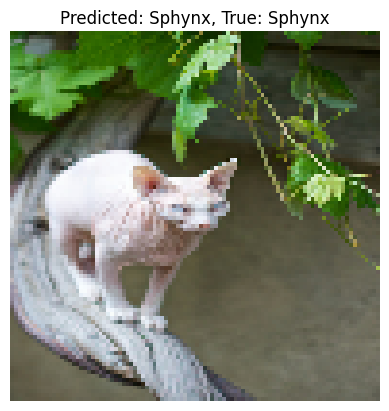

In [20]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


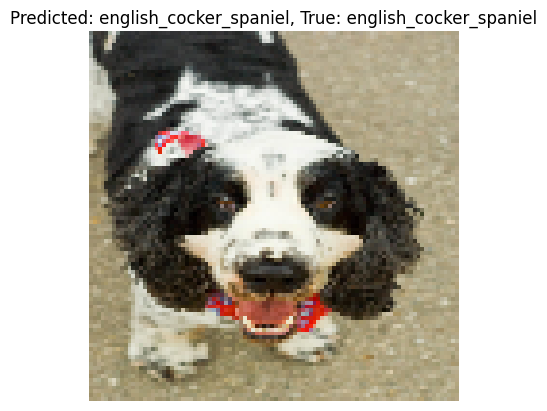

In [21]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


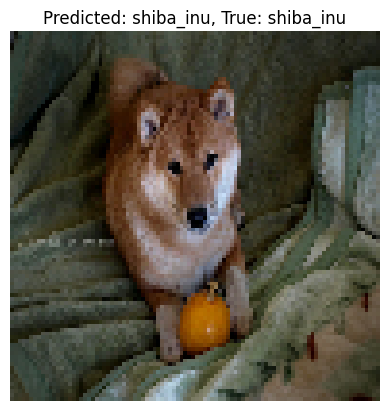

In [22]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


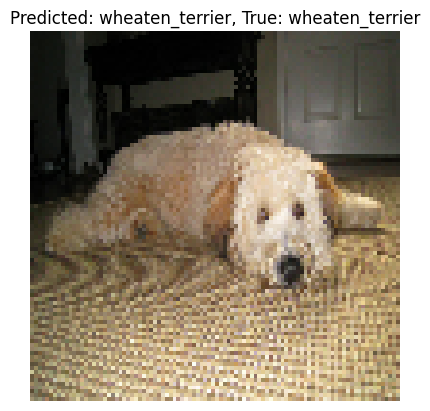

In [23]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


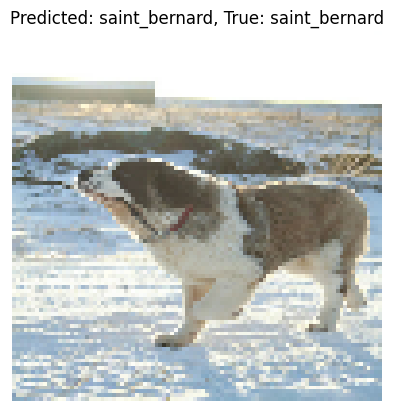

In [24]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


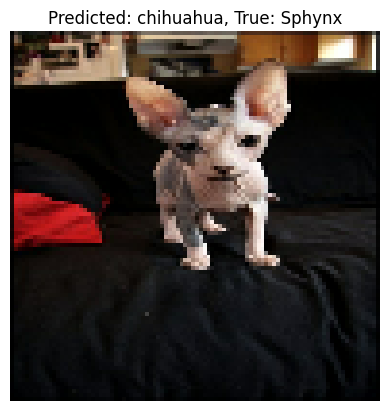

In [25]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


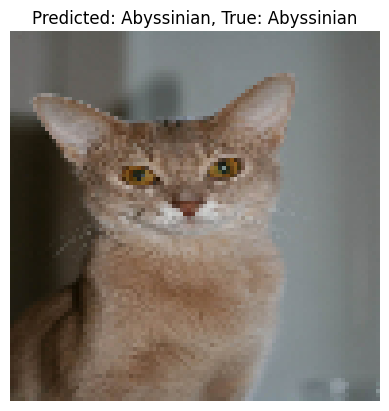

In [26]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


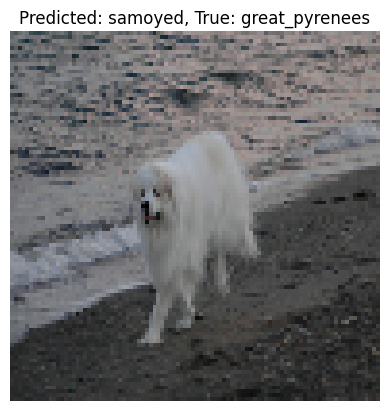

In [27]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


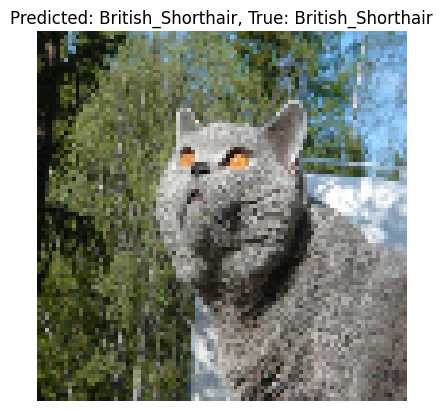

In [28]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


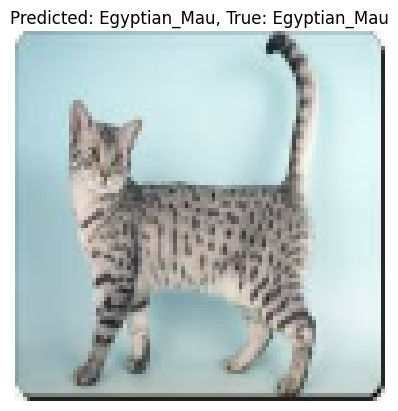

In [29]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


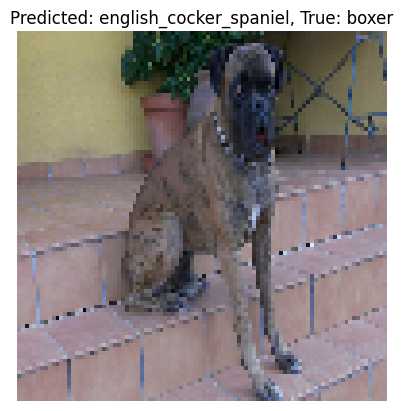

In [30]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


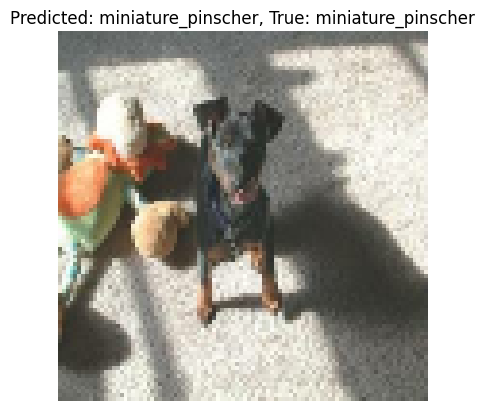

In [31]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


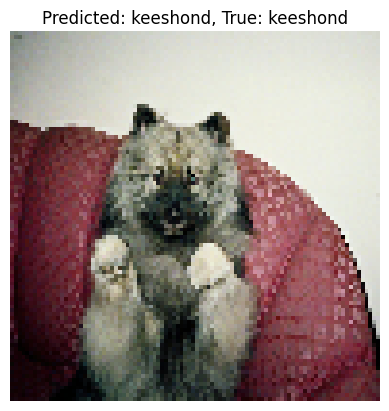

In [32]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


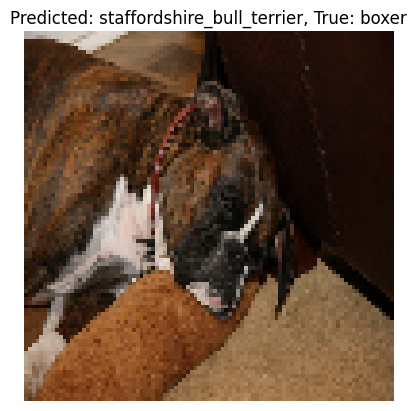

In [33]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


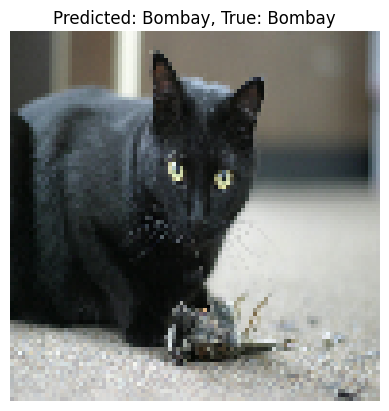

In [34]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


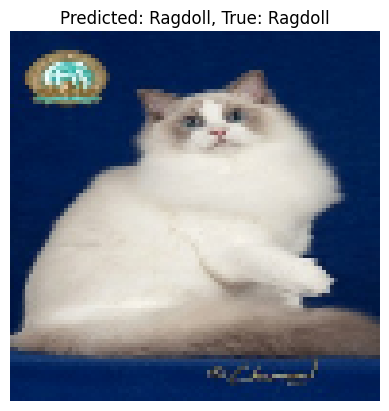

In [35]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


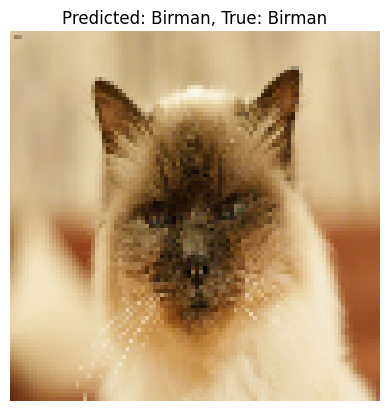

In [36]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


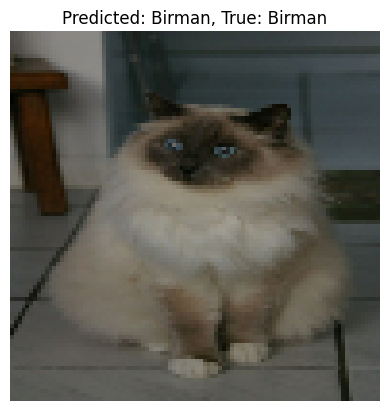

In [37]:
make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


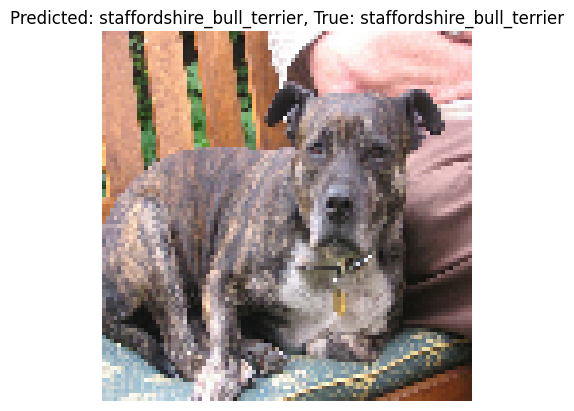

In [38]:
make_prediction()